# Restaurent Delivery Time Prediction - Team Firebirds

Using Data Available from Restaurants, Predict the Only Order Delivery Time Based on certain Factors

## Documentations that helped us achieve this tasks:

1) [How do I combine quantitative and categorical data to create a regression model that can predict sales?](https://www.quora.com/How-do-I-combine-quantitative-and-categorical-data-to-create-a-regression-model-that-can-predict-sales)

2) [Converting a pandas DataFrame into a TensorFlow Dataset](https://medium.com/when-i-work-data/converting-a-pandas-dataframe-into-a-tensorflow-dataset-752f3783c168)

3) [A Guide on XGBoost hyperparameters tuning](https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning)

4) [Optimizing Hyperparameters in Random Forest Classification](https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6)

5) [Top 3 Methods for Handling Skewed Data](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45)



## Task 1

Predict delivery time and accuracy in training and validation set.

### (1) Preprocessing The Data

#### 1) Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("Data_Train.xlsx")
df_test = pd.read_excel("Data_Test.xlsx")
df.head()

Restaurant                             Location  ... Reviews Delivery_Time
0    ID_6321  FTI College, Law College Road, Pune  ...       4    30 minutes
1    ID_2882                 Sector 3, Marathalli  ...       4    30 minutes
2    ID_1595                       Mumbai Central  ...      30    65 minutes
3    ID_5929                      Sector 1, Noida  ...      95    30 minutes
4    ID_6123   Rmz Centennial, I Gate, Whitefield  ...     235    65 minutes

[5 rows x 9 columns]

In [ ]:
A = df['Location'].unique()
len(A)

35

In [ ]:
A

array(['FTI College, Law College Road, Pune', 'Sector 3, Marathalli',
       'Mumbai Central', 'Sector 1, Noida',
       'Rmz Centennial, I Gate, Whitefield', 'Delhi University-GTB Nagar',
       'Yerawada, Pune, Maharashtra',
       'Delhi Administration Flats, Timarpur', 'Moulali, Kolkata',
       'Dockyard Road, Mumbai CST Area', 'Pune University',
       'Gora Bazar, Rajbari, North Dumdum, Kolkata',
       'D-Block, Sector 63, Noida', 'Sector 14, Noida',
       'Mico Layout, Stage 2, BTM Layout,Bangalore',
       'Laxman Vihar Industrial Area, Sector 3A, Gurgoan',
       'Tiretti, Kolkata', 'Sandhurst Road, Mumbai CST Area',
       'MG Road, Pune', 'Hyderabad Public School, Begumpet', 'Majestic',
       'Chandni Chowk, Kolkata', 'Delhi High Court, India Gate',
       'Chatta Bazaar, Malakpet, Hyderabad', 'Sector 63A,Gurgaon',
       'Delhi Cantt.', 'Tejas Nagar Colony, Wadala West, Mumbai',
       'Babarpur, New Delhi, Delhi', 'Nathan Road, Mangaldas Road, Pune',
       'Panjetan C

### (2) Exploratory Data Analysis

Let us plot diffent graphs to get the best overview of the given data and relations between the data.

#### 1) Location vs Average Del. Time

In [ ]:
#Creating a dictionary containing key-value pairs, where key is Location and pair is dataframe related to that location.
Locvise_Dataframes = dict()
Locs = df['Location'].unique()

for i in Locs:
  Locvise_Dataframes[i] = df[df['Location'] == i]


In [ ]:
#Locvise_Dataframes
LocvsTime = dict()

for Loc,data in Locvise_Dataframes.items():
  A = map(lambda x: int(x.split()[1]),data['Delivery_Time'].to_string().split('\n'))
  LocvsTime[Loc] = np.mean(list(A))
  
#int(y.values[0].split()[0])

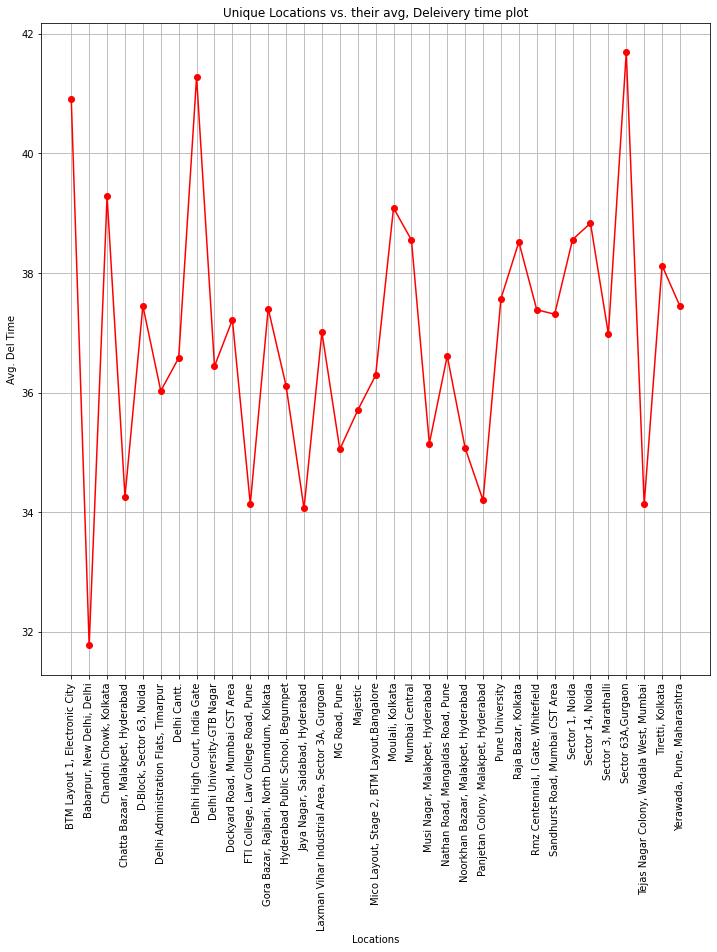

In [ ]:
lists = sorted(LocvsTime.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize = (12,12))
plt.title('Unique Locations vs. their avg, Deleivery time plot')
plt.xlabel('Locations')
plt.ylabel('Avg. Del Time')
plt.plot(x, y,'r-',marker = 'o')
plt.grid()
plt.xticks(rotation = 90)
plt.show()

From the graph we can see that the **delivery times** are related to the **Locations**, so Location is an **important column**.

#### 2) Cuisines vs Average Del. Time

In [ ]:
Cusvise_Dataframes = dict()
Cus = df['Cuisines'].unique()

for i in Cus:
  Cusvise_Dataframes[i] = df[df['Cuisines'] == i]

print(len(Cusvise_Dataframes))

2179


In [ ]:
#For Cuisins
#Locvise_Dataframes
CusvsTime = dict()

for Cus,data in Cusvise_Dataframes.items():
  A = map(lambda x: int(x.split()[1]),data['Delivery_Time'].to_string().split('\n'))
  CusvsTime[Cus] = np.mean(list(A))
  
#int(y.values[0].split()[0])
CusvsTime

{'Fast Food, Rolls, Burger, Salad, Wraps': 30.0,
 'Ice Cream, Desserts': 34.50819672131148,
 'Italian, Street Food, Fast Food': 53.333333333333336,
 'Mughlai, North Indian, Chinese': 43.4375,
 'Cafe, Beverages': 35.714285714285715,
 'South Indian, North Indian, Chinese': 37.72727272727273,
 'Beverages, Fast Food': 34.905660377358494,
 'Chinese, Thai, Asian': 50.0,
 'Mithai, Street Food': 36.36986301369863,
 'Fast Food, North Indian, Rolls, Chinese, Momos, Mughlai': 65.0,
 'North Indian, Chinese, Mughlai': 39.67948717948718,
 'Chinese, Thai, Indonesian, Italian': 45.0,
 'Burger, Fast Food, Desserts, Beverages': 30.0,
 'Beverages': 33.6764705882353,
 'Fast Food': 34.07834101382488,
 'Biryani, Mughlai': 30.0,
 'Italian': 40.625,
 'Chinese, North Indian, South Indian, Fast Food': 31.25,
 'Kerala, Bihari': 30.0,
 'South Indian': 34.870370370370374,
 'Chinese, North Indian, Rolls, Momos': 45.0,
 'North Indian, Rolls': 37.857142857142854,
 'North Indian, Chinese': 36.96254071661238,
 'Biryani

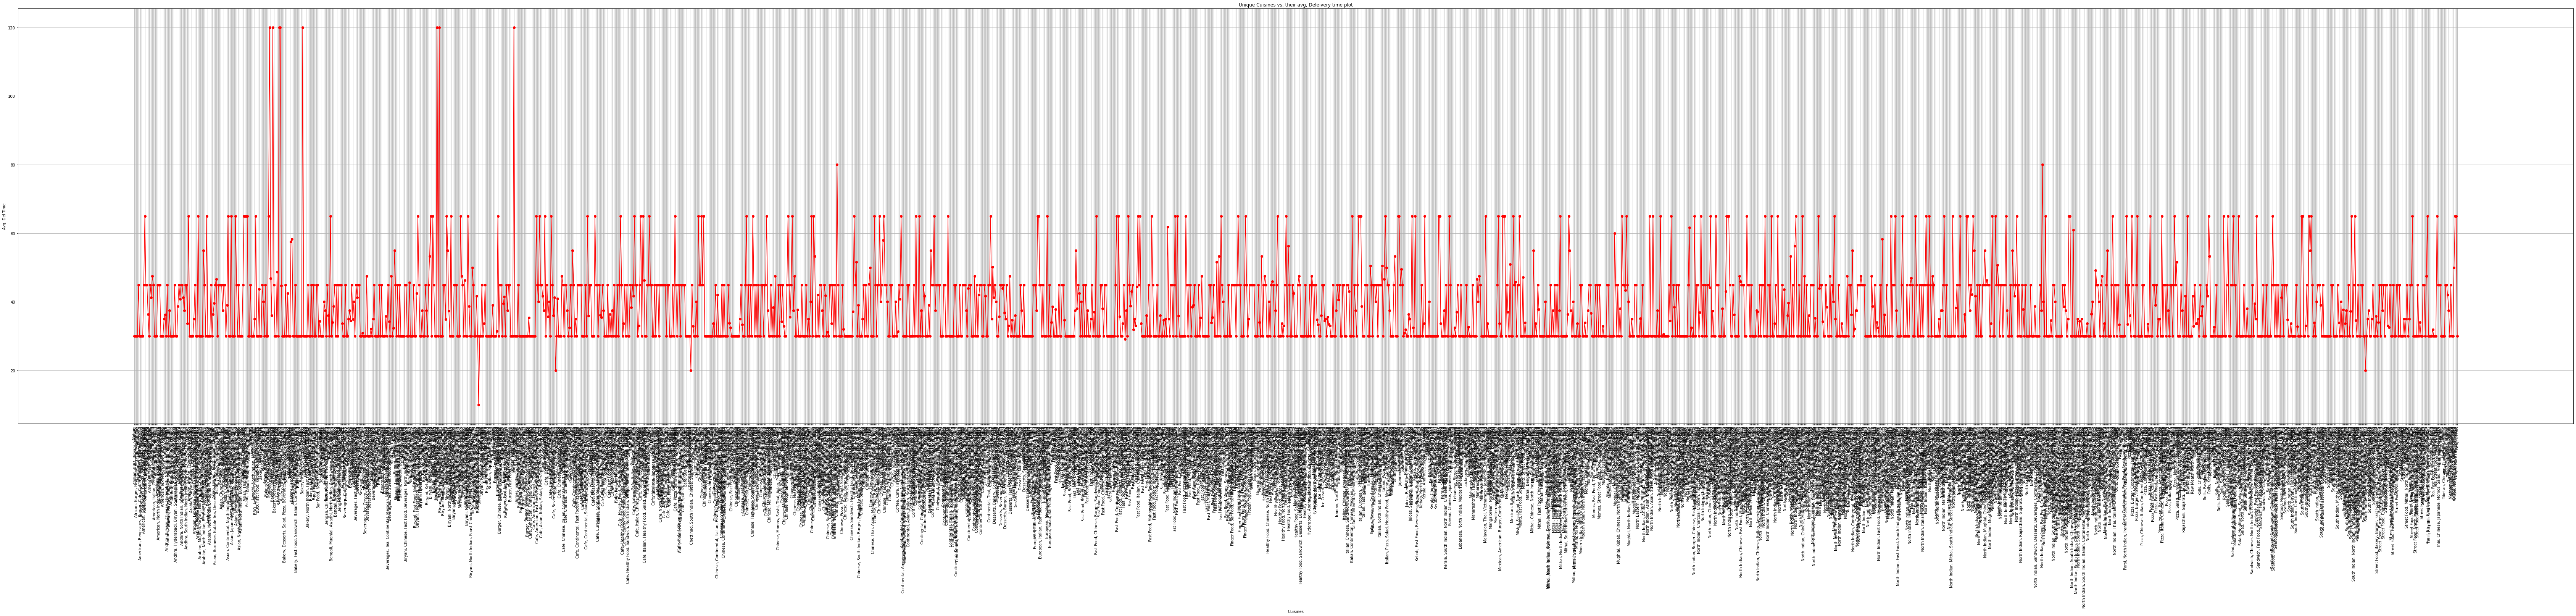

In [ ]:
lists = sorted(CusvsTime.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize = (120,20)) 
plt.title('Unique Cuisines vs. their avg, Deleivery time plot')
plt.xlabel('Cuisines')
plt.ylabel('Avg. Del Time')
plt.plot(x, y,'r-',marker = 'o')
plt.grid()
plt.xticks(rotation = 90)
plt.show()

We can see that most of the average delivery time for cuisines are 30 minutes and 45 minutes... so there is a high chance that out model will take cuisines as a main factor & will have a bias towards 30 and 45 minutes.

From above data, there looks like a high chance that our delivery time values are skewed for 30 and 45 minutes time, and all the other delivery time values are less in number,

lest see the distribution of delivery time.

#### 3) Distribution of Delivery times

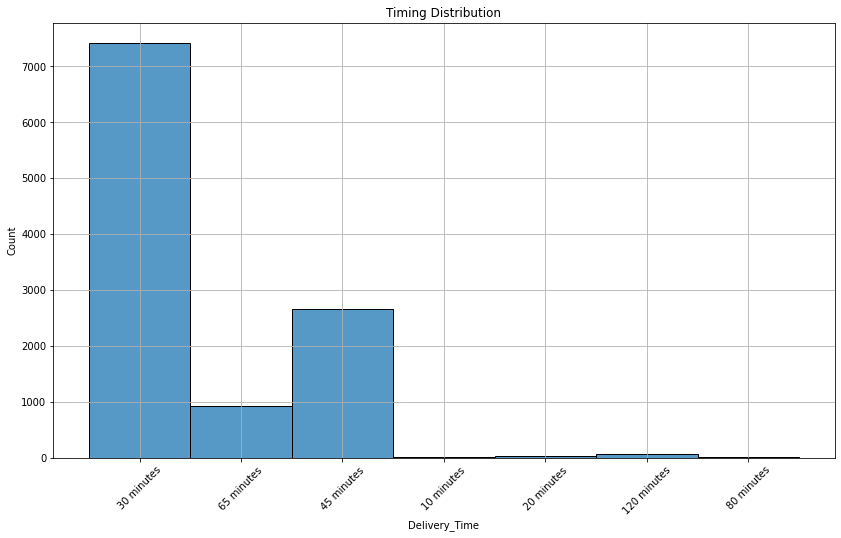

In [ ]:
plt.figure(figsize = (14,8))
ax = plt.gca()
sns.histplot(df,x = 'Delivery_Time', ax = ax)
plt.title('Timing Distribution')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

Here we go, the given data here is skewed towards 30 minutes delivery time, so there is a high chance that model will be biased toward giving that time.

We have to take that in consideration while fine-tuning & Hyperparameter-tuning the model.

-> Lets see effect of some other features like Votes,reviews,etc. on delivery time

In [ ]:
df.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

#### 4) Average_cost vs Average Del. Time

In [ ]:
Pricevise_Dataframes = dict()
Price = df['Average_Cost'].unique()

for i in Price:
  Pricevise_Dataframes[i] = df[df['Average_Cost'] == i]

print(len(Pricevise_Dataframes))
Pricevise_Dataframes

In [ ]:
#For Cuisins
#Locvise_Dataframes
PricevsTime = dict()

for Pric,data in Pricevise_Dataframes.items():
  A = map(lambda x: int(x.split()[1]),data['Delivery_Time'].to_string().split('\n'))
  PricevsTime[Pric] = np.mean(list(A))
  
#int(y.values[0].split()[0])
PricevsTime

{'for': 30.0,
 '₹1,000': 37.916666666666664,
 '₹1,100': 45.0,
 '₹1,150': 30.0,
 '₹1,200': 51.25,
 '₹1,400': 45.0,
 '₹100': 34.22369964802503,
 '₹150': 35.40617384240455,
 '₹2,050': 30.0,
 '₹200': 37.56402344955261,
 '₹250': 39.27355278093076,
 '₹300': 42.253258845437614,
 '₹350': 40.830388692579504,
 '₹400': 41.98581560283688,
 '₹450': 43.73015873015873,
 '₹50': 34.79245283018868,
 '₹500': 44.10891089108911,
 '₹550': 41.416666666666664,
 '₹600': 39.8051948051948,
 '₹650': 43.54545454545455,
 '₹700': 44.666666666666664,
 '₹750': 45.26315789473684,
 '₹800': 39.20454545454545,
 '₹850': 44.583333333333336,
 '₹900': 48.0,
 '₹950': 33.75}

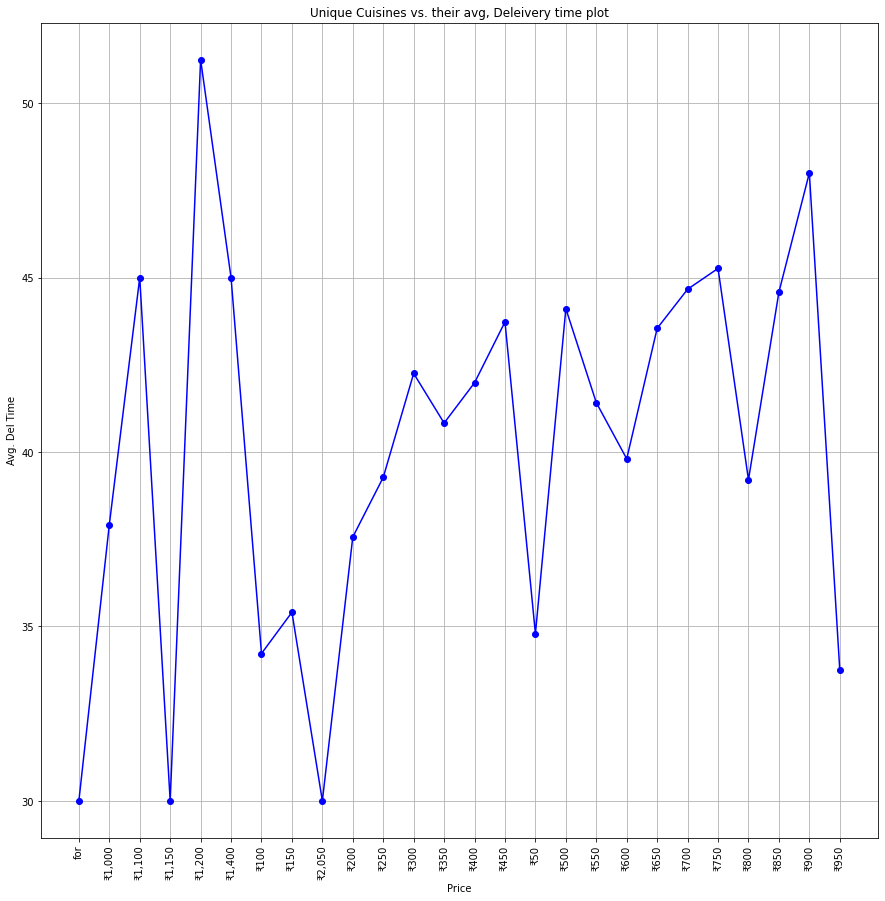

In [ ]:
lists = sorted(PricevsTime.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize = (15,15)) 
plt.title('Average Cost vs. their avg, Deleivery time plot')
plt.xlabel('Average Cost')
plt.ylabel('Avg. Del Time')
plt.plot(x, y,'b-',marker = 'o')
plt.grid()
plt.xticks(rotation = 90)

plt.show()

Here we can see Average price has some direct relation with the delivery time 

#### 5) Minimum_cost vs Average Del. Time

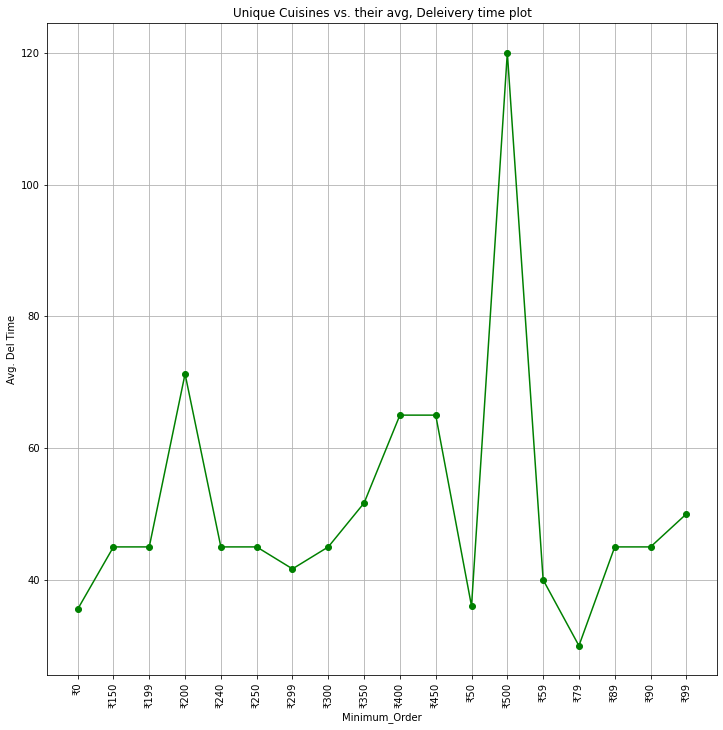

In [ ]:
# For minimum cost
Pricevise_Dataframes = dict()
Price = df['Minimum_Order'].unique()

for i in Price:
  Pricevise_Dataframes[i] = df[df['Minimum_Order'] == i]

#print(len(Pricevise_Dataframes))
#Pricevise_Dataframes

#For Cuisins
#Locvise_Dataframes
PricevsTime = dict()

for Pric,data in Pricevise_Dataframes.items():
  A = map(lambda x: int(x.split()[1]),data['Delivery_Time'].to_string().split('\n'))
  PricevsTime[Pric] = np.mean(list(A))
  
#int(y.values[0].split()[0])
#PricevsTime

lists = sorted(PricevsTime.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize = (12,12)) 
plt.title('Minimum Order vs. their avg, Deleivery time plot')
plt.xlabel('Minimum_Order')
plt.ylabel('Avg. Del Time')
plt.plot(x, y,'g-',marker = 'o')
plt.grid()
plt.xticks(rotation = 90)

plt.show()

We can see some relation in this plot. So Minimum_order column is useful.

#### 6) Ratings vs Average Del. Time

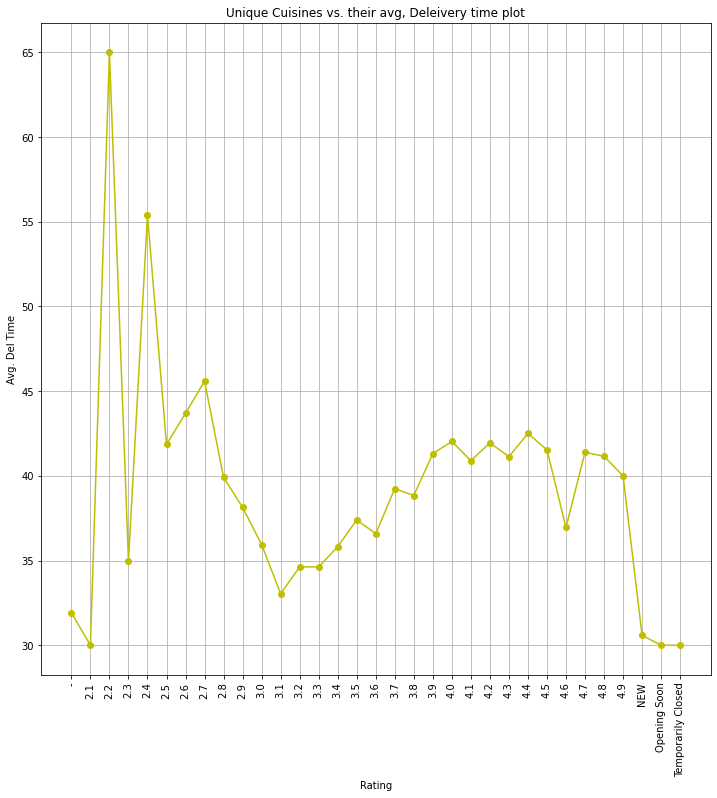

In [ ]:
# For Rating
Pricevise_Dataframes = dict()
Price = df['Rating'].unique()

for i in Price:
  Pricevise_Dataframes[i] = df[df['Rating'] == i]

#print(len(Pricevise_Dataframes))
#Pricevise_Dataframes

#For Cuisins
#Locvise_Dataframes
PricevsTime = dict()

for Pric,data in Pricevise_Dataframes.items():
  A = map(lambda x: int(x.split()[1]),data['Delivery_Time'].to_string().split('\n'))
  PricevsTime[Pric] = np.mean(list(A))
  
#int(y.values[0].split()[0])
#PricevsTime

lists = sorted(PricevsTime.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize = (12,12)) 
plt.title('Ratings vs. their avg, Deleivery time plot')
plt.xlabel('Rating')
plt.ylabel('Avg. Del Time')
plt.plot(x, y,'y-',marker = 'o')
plt.grid()
plt.xticks(rotation = 90)

plt.show()

As we can see reviews has no direct relation with the delivery time

In [ ]:
df.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

#### 7) Votes vs Average Del. Time

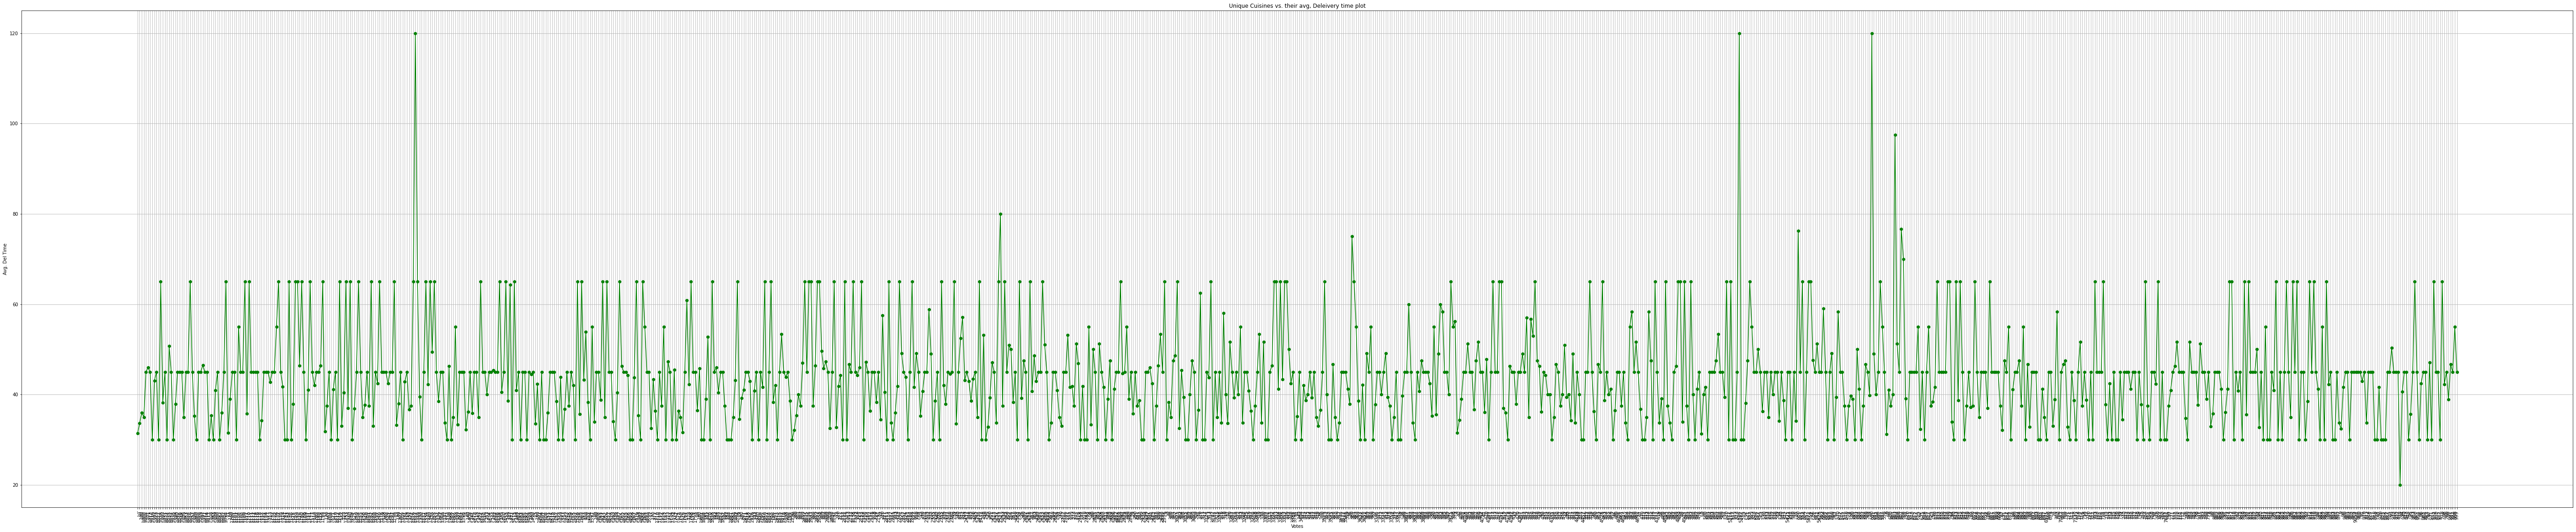

In [ ]:
# For Votes
Pricevise_Dataframes = dict()
Price = df['Votes'].unique()

for i in Price:
  Pricevise_Dataframes[i] = df[df['Votes'] == i]

#print(len(Pricevise_Dataframes))
#Pricevise_Dataframes

#For Cuisins
#Locvise_Dataframes
PricevsTime = dict()

for Pric,data in Pricevise_Dataframes.items():
  A = map(lambda x: int(x.split()[1]),data['Delivery_Time'].to_string().split('\n'))
  PricevsTime[Pric] = np.mean(list(A))
  
#int(y.values[0].split()[0])
#PricevsTime

lists = sorted(PricevsTime.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize = (100,20)) 
plt.title('Votes vs. their avg, Deleivery time plot')
plt.xlabel('Votes')
plt.ylabel('Avg. Del Time')
plt.plot(x, y,'g-',marker = 'o')
plt.grid()
plt.xticks(rotation = 90)

plt.show()

#### 8) Reviews vs Average Del. Time

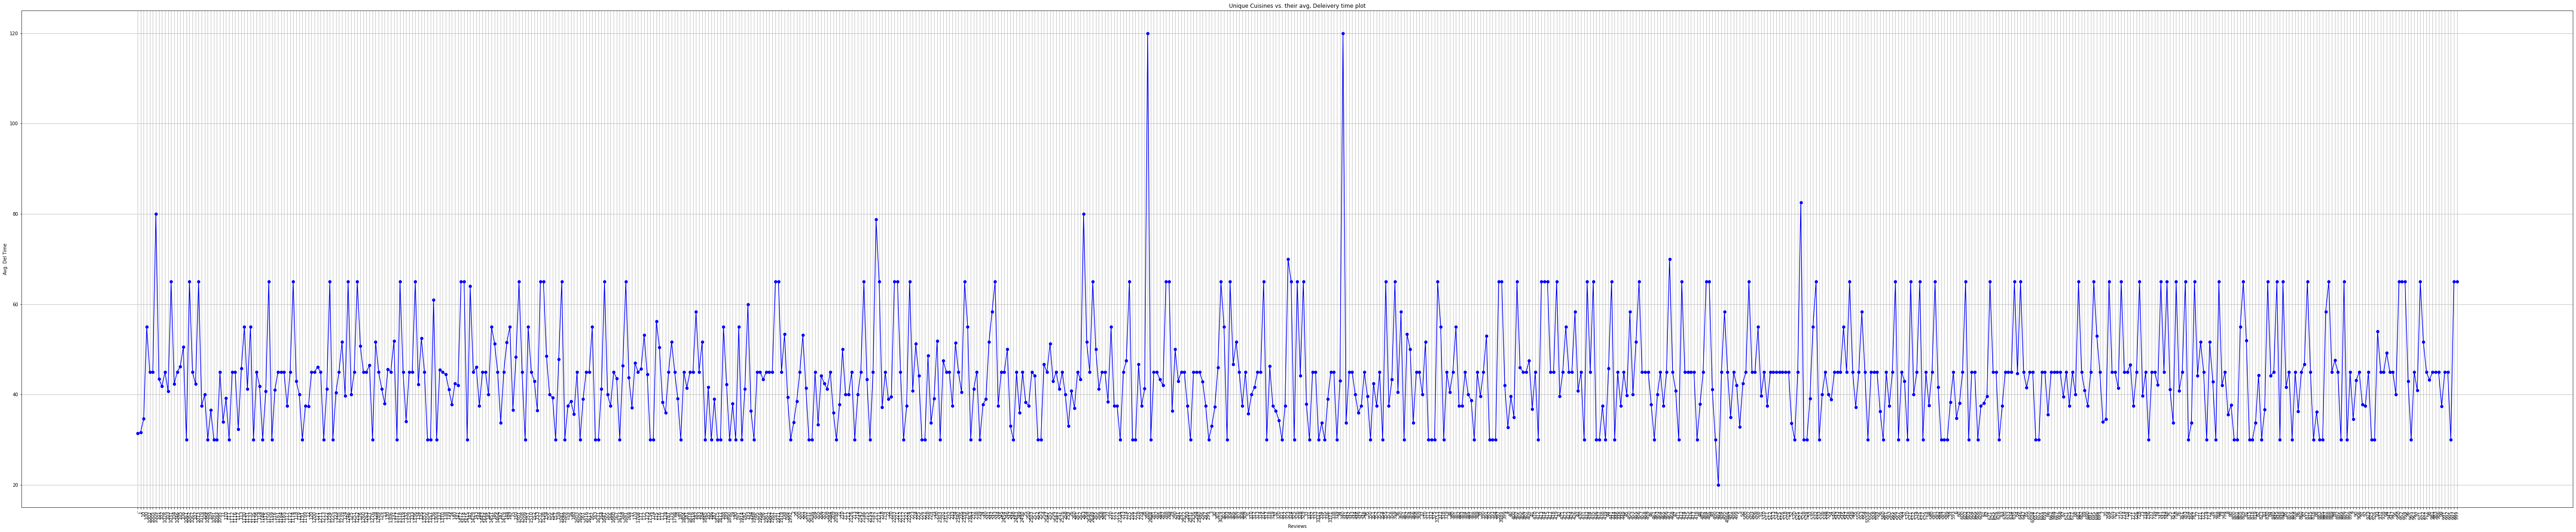

In [ ]:
# For Reviews
Pricevise_Dataframes = dict()
Price = df['Reviews'].unique()

for i in Price:
  Pricevise_Dataframes[i] = df[df['Reviews'] == i]

#print(len(Pricevise_Dataframes))
#Pricevise_Dataframes

#For Cuisins
#Locvise_Dataframes
PricevsTime = dict()

for Pric,data in Pricevise_Dataframes.items():
  A = map(lambda x: int(x.split()[1]),data['Delivery_Time'].to_string().split('\n'))
  PricevsTime[Pric] = np.mean(list(A))
  
#int(y.values[0].split()[0])
#PricevsTime

lists = sorted(PricevsTime.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize = (100,20)) 
plt.title('Reviews vs. their avg, Deleivery time plot')
plt.xlabel('Reviews')
plt.ylabel('Avg. Del Time')
plt.plot(x, y,'b-',marker = 'o')
plt.grid()
plt.xticks(rotation = 90)

plt.show()

Voting and ratings also has no direct impact on delivery time!

As we have analysed our data compleately, now we can carry on with the model developement phase.

### (3) Implementing Model

First we have to transform the data into computer redable form.

#### 1) Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder

In [ ]:
train_data=pd.read_excel('Data_Train.xlsx')
#test_data=pd.read_excel('/Data_Test.xlsx')

In [ ]:
train_data.head()

Restaurant                             Location  ... Reviews Delivery_Time
0    ID_6321  FTI College, Law College Road, Pune  ...       4    30 minutes
1    ID_2882                 Sector 3, Marathalli  ...       4    30 minutes
2    ID_1595                       Mumbai Central  ...      30    65 minutes
3    ID_5929                      Sector 1, Noida  ...      95    30 minutes
4    ID_6123   Rmz Centennial, I Gate, Whitefield  ...     235    65 minutes

[5 rows x 9 columns]

#### 2) Transforming the data into Numeric form

=> we convert the catagorical data into numerical form by applying **Label Encoding** on it. By this method the _catagorical data_ will be converted into different unique numbers pointing towards different classis, so that the model can make sence of this data. 

=> Also, we converted the other Numerical string data into float form.

In [ ]:
train_data['Restaurant']=LabelEncoder().fit_transform(train_data['Restaurant'])
train_data['Location']=LabelEncoder().fit_transform(train_data['Location'])
train_data['Cuisines']=LabelEncoder().fit_transform(train_data['Cuisines'])
train_data['Average_Cost']=pd.to_numeric(train_data['Average_Cost'].str.replace('[^0-9]',''))
train_data['Minimum_Order']=pd.to_numeric(train_data['Minimum_Order'].str.replace('[^0-9]',''))
train_data['Rating']=pd.to_numeric(train_data['Rating'].apply(lambda x: np.nan if x in ['Temporarily Closed','Opening Soon','-','NEW'] else x))
train_data['Votes']=pd.to_numeric(train_data['Votes'].apply(lambda x: np.nan if x=='-' else x))
train_data['Reviews']=pd.to_numeric(train_data['Reviews'].apply(lambda x: np.nan if x=='-' else x))
train_data['Delivery_Time']=pd.to_numeric(train_data['Delivery_Time'].str.replace('[^0-9]',''))

In [ ]:
train_data.head()

Restaurant  Location  Cuisines  ...  Votes  Reviews  Delivery_Time
0        5086        10       995  ...   12.0      4.0             30
1        1785        30      1116  ...   11.0      4.0             30
2         571        19      1182  ...   99.0     30.0             65
3        4708        28      1398  ...  176.0     95.0             30
4        4896        26       388  ...  521.0    235.0             65

[5 rows x 9 columns]

#### 3) Checking out for the Null values and Dealing with them

This heatmap below shows the null values in the data. We can see that tere are many null values in the Reviews, Ratings & Votes columns.

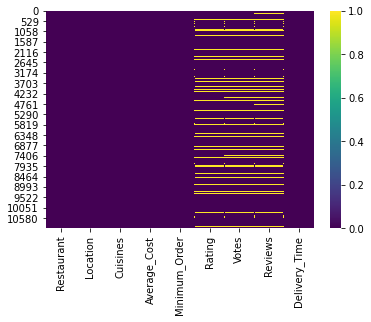

In [ ]:
sns.heatmap(train_data.isnull(),cmap='viridis')

So as we see there are many null values in these 3 columns, so we have to remove or replace those values with other values.

In [ ]:
train_data['Rating']=train_data['Rating'].fillna(train_data['Rating'].median())
train_data['Votes']=train_data['Votes'].fillna(train_data['Votes'].mean())
train_data['Reviews']=train_data['Reviews'].fillna(train_data['Reviews'].mean())
train_data['Average_Cost']=train_data['Average_Cost'].fillna(train_data['Average_Cost'].mean())
train_data.head()

Restaurant  Location  Cuisines  ...  Votes  Reviews  Delivery_Time
0        5086        10       995  ...   12.0      4.0             30
1        1785        30      1116  ...   11.0      4.0             30
2         571        19      1182  ...   99.0     30.0             65
3        4708        28      1398  ...  176.0     95.0             30
4        4896        26       388  ...  521.0    235.0             65

[5 rows x 9 columns]

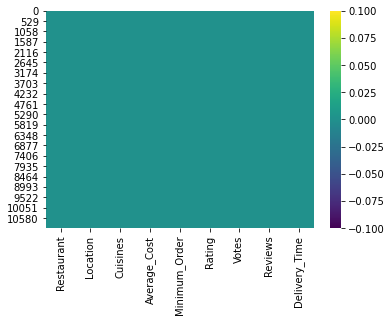

In [ ]:
sns.heatmap(train_data.isnull(),cmap='viridis')

No null data, BiNGO!

Now dropping the columns that dont have direct impact on the prediction of Delivery time.

In [ ]:
train_data.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [ ]:
train_data = train_data.drop(columns = ['Restaurant','Cuisines','Votes','Reviews'],axis = 1)

In [ ]:
train_data.head()

Location  Average_Cost  Minimum_Order  Rating  Delivery_Time
0        10         200.0             50     3.5             30
1        30         100.0             50     3.5             30
2        19         150.0             50     3.6             65
3        28         250.0             99     3.7             30
4        26         200.0             99     3.2             65

#### 4) Implementing OneHot Encoding

=> Label Encoded catagorical data is useful for many tasks, but the main flow in that encoding method is that sometimes the model can consider that **catagorical data** as a **numerical data** and then it will try to use class numbers in a numerical way.



```
Example:
You might see this kind of equation in some node of Random Forest,

(2028 * 0.54)

Here 2028 is a class number but the model is trying to apply weight on it.
```



=> The solution of this problem is oneHot Encoding, in this method the class value will be denoted as 1 and all the other values will be denoted as 0. In this way we will create multiple columns containg zeros and ones.



```
OneHot Encoding Example:

10 -> 1 0 0 0 0 0 0 0 0 0
5  -> 0 0 0 0 0 1 0 0 0 0
```



=> It is seen that the models usualy performs better with the OneHot Encoding , **Spacially when there is catagorical data mixed with quantitative data!** 

Lets Apply It!

In [ ]:
Loc_One_enc = OneHotEncoder(handle_unknown='ignore')
loc_df = pd.DataFrame(Loc_One_enc.fit_transform(train_data[['Location']]).toarray())

train_data = train_data.join(loc_df)
train_data.head()

Location  Average_Cost  Minimum_Order  Rating  ...   31   32   33   34
0        10         200.0             50     3.5  ...  0.0  0.0  0.0  0.0
1        30         100.0             50     3.5  ...  0.0  0.0  0.0  0.0
2        19         150.0             50     3.6  ...  0.0  0.0  0.0  0.0
3        28         250.0             99     3.7  ...  0.0  0.0  0.0  0.0
4        26         200.0             99     3.2  ...  0.0  0.0  0.0  0.0

[5 rows x 40 columns]

In [ ]:
train_data.drop(inplace = True, columns = ['Location'])
train_data.head()

Average_Cost  Minimum_Order  Rating  Delivery_Time  ...   31   32   33   34
0         200.0             50     3.5             30  ...  0.0  0.0  0.0  0.0
1         100.0             50     3.5             30  ...  0.0  0.0  0.0  0.0
2         150.0             50     3.6             65  ...  0.0  0.0  0.0  0.0
3         250.0             99     3.7             30  ...  0.0  0.0  0.0  0.0
4         200.0             99     3.2             65  ...  0.0  0.0  0.0  0.0

[5 rows x 39 columns]

#### 5) Applying MinMax Scalling

This will scale all the quantitative data in the range of o to 1 where 0 stands for that perticuler column's lowest value and 1 stands for that column's highest value.

We are doing this step because models tend to work better when the input data is in the range of 0 to 1.

In [ ]:
Cost_minmax = MinMaxScaler()
MinOrd_minmax = MinMaxScaler()
Rating_minmax = MinMaxScaler()
Delivery_minmax = MinMaxScaler()

Cost_minmax = Cost_minmax.fit(np.array(train_data['Average_Cost']).reshape(-1,1))
MinOrd_minmax = MinOrd_minmax.fit(np.array(train_data['Minimum_Order']).reshape(-1,1))
Rating_minmax = Rating_minmax.fit(np.array(train_data['Rating']).reshape(-1,1))
Delivery_minmax = Delivery_minmax.fit(np.array(train_data['Delivery_Time']).reshape(-1,1))

train_data['Average_Cost'] = Cost_minmax.transform(np.array(train_data['Average_Cost']).reshape(-1,1))
train_data['Minimum_Order'] = MinOrd_minmax.transform(np.array(train_data['Minimum_Order']).reshape(-1,1))
train_data['Rating'] = Rating_minmax.transform(np.array(train_data['Rating']).reshape(-1,1))
train_data['Delivery_Time'] = Delivery_minmax.transform(np.array(train_data['Delivery_Time']).reshape(-1,1))

In [ ]:
train_data.head()

Average_Cost  Minimum_Order    Rating  Delivery_Time  ...   31   32   33   34
0         0.075          0.100  0.500000       0.181818  ...  0.0  0.0  0.0  0.0
1         0.025          0.100  0.500000       0.181818  ...  0.0  0.0  0.0  0.0
2         0.050          0.100  0.535714       0.500000  ...  0.0  0.0  0.0  0.0
3         0.100          0.198  0.571429       0.181818  ...  0.0  0.0  0.0  0.0
4         0.075          0.198  0.392857       0.500000  ...  0.0  0.0  0.0  0.0

[5 rows x 39 columns]

#### 6) Doing Train_Test_Split 

Here 2/3rd of the data will be train data and 1/3rd of the data will be Validation data on which we will evaluate the model.

In [ ]:
X=train_data.drop('Delivery_Time',axis=1)
y=train_data['Delivery_Time']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=69)

In [ ]:
X_train.shape

(7765, 38)

#### 7) Describing the loss function

In this challange we are told to use Mean Absolute Percentage Error function to calculate the error, so here I am implementing it.

In [ ]:
from sklearn.metrics import make_scorer

def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error( y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

score = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

#### 8) Now fitting gradient boosting model

**We are choosing the Gradient Boosting Regression model because** 

1) It works best whene we have both catagorical and quantitative data as the input to the model.

2) Works best when number of features are low.

3) Its an ensambling model so it will rely on multiple model's outputs to give its final output which will increase its accuracy.

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb1 = XGBRegressor()

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear','reg:squarederror'],
              'learning_rate': [.01, 0.1, 0.2], #so called `eta` value
              'max_depth': [3, 5, 7, 9, 15, 30],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [5,50,250,500]}

#### 9) Hyper-Parameter Tuning

-> This is an important step in building of this model as the model requires perfect set of Hyper-Parameters to give the best output.

-> Here we are using **GridsearchCV** to performe various cross-validation on the model using different parameters from the above dictionary.

In [ ]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [ ]:
xgb_grid.fit(X_train,y_train,)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   48.7s
[Parallel(n_jobs=5)]: Done  96 out of  96 | elapsed:  2.2min finished


0.15330468281338638
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 50, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


Here we got the best set of parameters for this model, for which the model achieves its best accuracy.

Lets train the model using this parameters.

#### 10) Fitting the First Regression Model



In [ ]:
model = XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.1, max_depth = 3, min_child_weight = 4, n_estimators = 50, nthread = 4, objective = 'reg:squarederror', silent = 1, subsample = 0.7)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimators=50,
             n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

#### 11) Evaluating model on the validation set on Validation Set

In [ ]:
pred1 = model.predict(X_test)

print('Grdient Boost:',mean_absolute_percentage_error(y_test,pred1))
print("\n")
print("Gradient Boosting Regressor Outputs:",list(zip(y_test,pred1))) 

Grdient Boost: 28.90325201899256


Gradient Boosting Regressor Outputs: [(0.3181818181818181, 0.39347583), (0.1818181818181818, 0.29126325), (0.4999999999999999, 0.23237404), (0.1818181818181818, 0.24210173), (0.1818181818181818, 0.22404042), (0.1818181818181818, 0.2167173), (0.1818181818181818, 0.20580667), (0.1818181818181818, 0.28780797), (0.1818181818181818, 0.23462173), (0.4999999999999999, 0.24063092), (0.1818181818181818, 0.23768958), (0.1818181818181818, 0.21697524), (0.1818181818181818, 0.21826747), (0.1818181818181818, 0.23858136), (0.3181818181818181, 0.22868994), (0.3181818181818181, 0.22404042), (0.1818181818181818, 0.22281316), (0.1818181818181818, 0.24459824), (0.3181818181818181, 0.21060225), (0.1818181818181818, 0.2177979), (0.1818181818181818, 0.21959776), (0.1818181818181818, 0.2192353), (0.1818181818181818, 0.24210173), (0.1818181818181818, 0.27059126), (0.1818181818181818, 0.23048472), (0.1818181818181818, 0.23322886), (0.1818181818181818, 0.21826747), (0.181818181

as we can see the gradient boosted model is not that much accurate, what may be the case?

1) Gradient boosted model can't work best with fat data(Modre features)

2) Cuisines(which we dropped) might have some relation with the data.

3) Model might work good with non normalised data.(Exceptional case)

#### 12) Not Satisfied with the output so lets try building the model again 

Removing one hot encoded data and merging back the label encoded data. And then applying gradient boost again.

In [ ]:
train_data=pd.read_excel('/Data_Train.xlsx')
#test_data=pd.read_excel('Data_Test.xlsx')

In [ ]:
Res = LabelEncoder().fit(train_data['Restaurant'])
Loc = LabelEncoder().fit(train_data['Location'])
Cus = LabelEncoder().fit(train_data['Cuisines'])

In [ ]:
train_data['Restaurant']=Res.transform(train_data['Restaurant'])
train_data['Location']=Loc.transform(train_data['Location'])
train_data['Cuisines']=Cus.transform(train_data['Cuisines'])
train_data['Average_Cost']=pd.to_numeric(train_data['Average_Cost'].str.replace('[^0-9]',''))
train_data['Minimum_Order']=pd.to_numeric(train_data['Minimum_Order'].str.replace('[^0-9]',''))
train_data['Rating']=pd.to_numeric(train_data['Rating'].apply(lambda x: np.nan if x in ['Temporarily Closed','Opening Soon','-','NEW'] else x))
train_data['Votes']=pd.to_numeric(train_data['Votes'].apply(lambda x: np.nan if x=='-' else x))
train_data['Reviews']=pd.to_numeric(train_data['Reviews'].apply(lambda x: np.nan if x=='-' else x))
train_data['Delivery_Time']=pd.to_numeric(train_data['Delivery_Time'].str.replace('[^0-9]',''))

In [ ]:
train_data['Rating']=train_data['Rating'].fillna(train_data['Rating'].median())
train_data['Votes']=train_data['Votes'].fillna(train_data['Votes'].mean())
train_data['Reviews']=train_data['Reviews'].fillna(train_data['Reviews'].mean())
train_data['Average_Cost']=train_data['Average_Cost'].fillna(train_data['Average_Cost'].mean())
train_data.head()

Restaurant  Location  Cuisines  ...  Votes  Reviews  Delivery_Time
0        5086        10       995  ...   12.0      4.0             30
1        1785        30      1116  ...   11.0      4.0             30
2         571        19      1182  ...   99.0     30.0             65
3        4708        28      1398  ...  176.0     95.0             30
4        4896        26       388  ...  521.0    235.0             65

[5 rows x 9 columns]

In [ ]:
X=train_data.drop('Delivery_Time',axis=1)
y=train_data['Delivery_Time']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=69)
X_train.head()

Restaurant  Location  Cuisines  ...  Rating  Votes  Reviews
4493        5845        13      1314  ...     3.7   37.0      3.0
243         6185        17      2168  ...     4.2  633.0    269.0
5699        6465        28      1522  ...     3.3    7.0      6.0
9719        2830         9       203  ...     3.7  246.0     83.0
103         1153        16      2102  ...     4.1  260.0    100.0

[5 rows x 8 columns]

#### 13) Fitting the Gradient Boosting Model Again on this Newlt preprocessed Dataset

In [ ]:
xgb1 = XGBRegressor()

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear','reg:squarederror'],
              'learning_rate': [.01, 0.1, 0.2], #so called `eta` value
              'max_depth': [3, 5, 7, 9, 15, 30],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [5,50,250,500]}

In [ ]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [ ]:
xgb_grid.fit(X_train,y_train,)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 144 candidates, totalling 288 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   23.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  3.9min
[Parallel(n_jobs=5)]: Done 288 out of 288 | elapsed:  6.7min finished


0.33421097863863874
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 30, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
model = XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.01, max_depth = 30, min_child_weight = 4, n_estimators = 500, nthread = 4, objective = 'reg:linear', silent = 1, subsample = 0.7)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=30, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

In [ ]:
pred1 = model.predict(X_test)

print('Grdient Boost:',mean_absolute_percentage_error(y_test,pred1))
print("\n")
print("Gradient Boosting Regressor Outputs:",list(zip(y_test,pred1))) 

Grdient Boost: 13.698228298804406


Gradient Boosting Regressor Outputs: [(45, 43.773064), (30, 37.564316), (65, 39.785553), (30, 33.111298), (30, 31.600004), (30, 29.98117), (30, 33.38394), (30, 27.593424), (30, 40.146374), (65, 43.921043), (30, 36.44846), (30, 32.532185), (30, 29.366217), (30, 30.818314), (45, 39.27338), (45, 37.921818), (30, 29.983444), (30, 32.059303), (45, 38.938972), (30, 41.723003), (30, 30.97225), (30, 30.532341), (30, 31.757769), (30, 30.171711), (30, 29.140337), (30, 39.68248), (30, 30.974163), (30, 33.35874), (45, 41.429153), (30, 31.368893), (30, 32.218468), (30, 31.809013), (45, 34.17119), (45, 35.074005), (30, 31.705767), (30, 32.006996), (65, 43.904354), (45, 42.52354), (65, 41.15249), (30, 36.837452), (30, 31.76426), (45, 38.84032), (30, 31.216024), (30, 41.564213), (45, 37.490425), (30, 29.807562), (30, 30.367882), (30, 32.38066), (65, 52.457226), (30, 30.446281), (30, 43.416904), (65, 51.59245), (65, 39.16798), (30, 31.234064), (65, 57.79907), (30, 44

### Task - 1 Finish. 

So after all this __*preprocessing*__ & __*careful Finetuning tuning*__ our regression model is achieving the MAPE of only **13.69%** which is half compared to our previous model and its pretty much accurate.

So we have successfully built a regression model that gives a **very low error** on the validation set & we are happy with the results.

#### Plotting the Tree(Model)

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

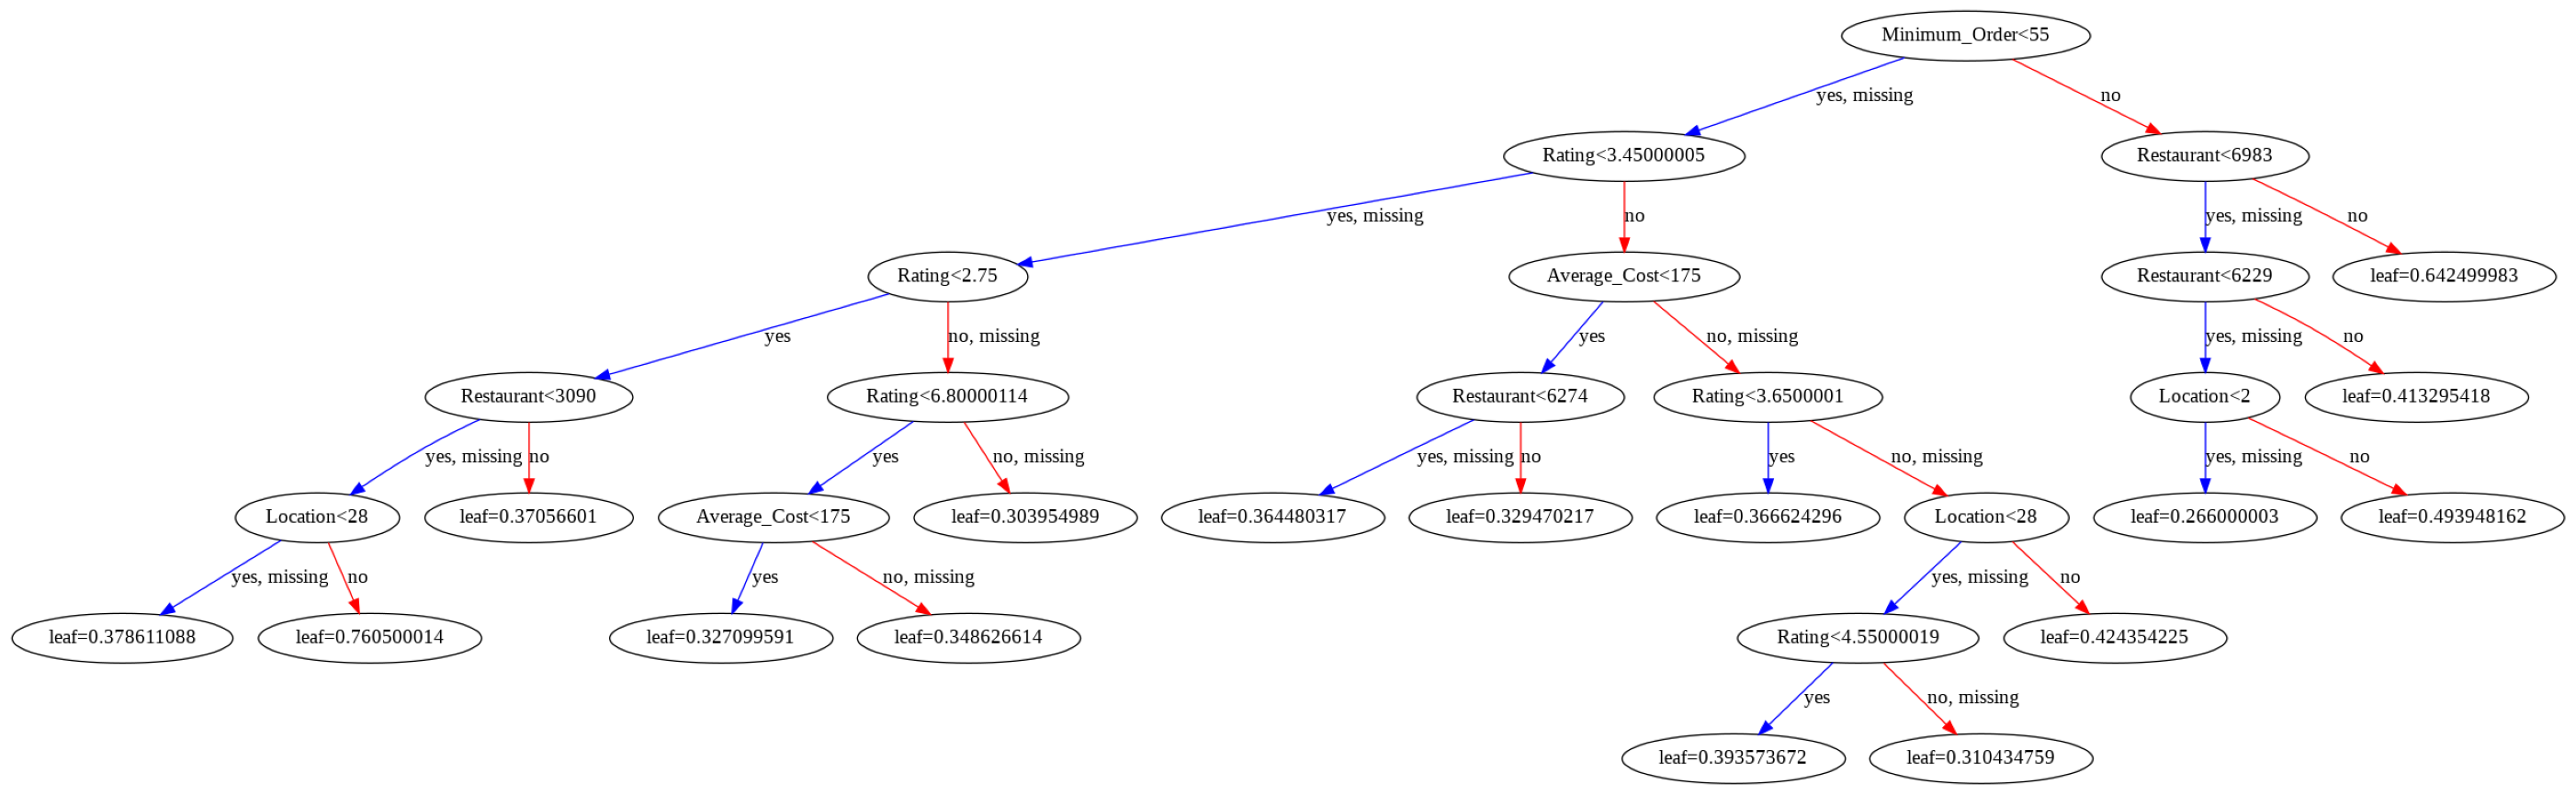

In [ ]:
fig = plt.figure(figsize=(50,50))
ax = plt.gca()
plot_tree(model,ax = ax)
plt.show()

## Task - 2

Predict the delivery time in the test set.

In [ ]:
test_data=pd.read_excel('/Data_Test.xlsx')

In [ ]:
test_data.head()

Restaurant                                    Location  ... Votes Reviews
0    ID_2842  Mico Layout, Stage 2, BTM Layout,Bangalore  ...   361     225
1     ID_730  Mico Layout, Stage 2, BTM Layout,Bangalore  ...     -       -
2    ID_4620                             Sector 1, Noida  ...    36      16
3    ID_5470                  Babarpur, New Delhi, Delhi  ...    66      33
4    ID_3249                             Sector 1, Noida  ...    38      14

[5 rows x 8 columns]

#### (1) Preprocessing the data

The test data might have some __unknown values__ that will create a problem while __lable encoding__ the data. So lets add an __unknown class__ in the label encoder to mitigate this error.  

In [ ]:
# Tansforming(Label Encoding) the test_data according to the previously train_data fit Label_Encoders  

test_data['Restaurant'] = test_data['Restaurant'].map(lambda s: '<unknown>' if s not in Res.classes_ else s)
Res.classes_ = np.append(Res.classes_, '<unknown>')

test_data['Location'] = test_data['Location'].map(lambda s: '<unknown>' if s not in Loc.classes_ else s)
Loc.classes_ = np.append(Loc.classes_, '<unknown>')

test_data['Cuisines'] = test_data['Cuisines'].map(lambda s: '<unknown>' if s not in Cus.classes_ else s)
Cus.classes_ = np.append(Cus.classes_, '<unknown>')

In [ ]:
test_data['Restaurant']=Res.transform(test_data['Restaurant'])
test_data['Location']=Loc.transform(test_data['Location'])
test_data['Cuisines']=Cus.transform(test_data['Cuisines'])
test_data['Average_Cost']=pd.to_numeric(test_data['Average_Cost'].str.replace('[^0-9]',''))
test_data['Minimum_Order']=pd.to_numeric(test_data['Minimum_Order'].str.replace('[^0-9]',''))
test_data['Rating']=pd.to_numeric(test_data['Rating'].apply(lambda x: np.nan if x in ['Temporarily Closed','Opening Soon','-','NEW'] else x))
test_data['Votes']=pd.to_numeric(test_data['Votes'].apply(lambda x: np.nan if x=='-' else x))
test_data['Reviews']=pd.to_numeric(test_data['Reviews'].apply(lambda x: np.nan if x=='-' else x))
#train_data['Delivery_Time']=pd.to_numeric(train_data['Delivery_Time'].str.replace('[^0-9]',''))

In [ ]:
test_data.head()

Restaurant  Location  Cuisines  ...  Rating  Votes  Reviews
0        7480        17      2179  ...     4.2  361.0    225.0
1        7480        17       270  ...     NaN    NaN      NaN
2        3461        28       860  ...     3.6   36.0     16.0
3        7480         1      2179  ...     3.6   66.0     33.0
4        2139        28       558  ...     2.9   38.0     14.0

[5 rows x 8 columns]

#### (2) Removing Null values from the test_dataset

In [ ]:
test_data['Rating']=test_data['Rating'].fillna(test_data['Rating'].median())
test_data['Votes']=test_data['Votes'].fillna(test_data['Votes'].mean())
test_data['Reviews']=test_data['Reviews'].fillna(test_data['Reviews'].mean())
test_data['Average_Cost']=test_data['Average_Cost'].fillna(test_data['Average_Cost'].mean())
test_data.head()

Restaurant  Location  Cuisines  ...  Rating       Votes     Reviews
0        7480        17      2179  ...     4.2  361.000000  225.000000
1        7480        17       270  ...     3.6  226.928315  111.410821
2        3461        28       860  ...     3.6   36.000000   16.000000
3        7480         1      2179  ...     3.6   66.000000   33.000000
4        2139        28       558  ...     2.9   38.000000   14.000000

[5 rows x 8 columns]

#### (3) Predicting on test_dataset

In [ ]:
Test_pred = model.predict(test_data)

### Task - 2 Finish

We have succesfully predicted the Delivery_times for the test data.

In [ ]:
Test_pred #Answers of the Task - 2

array([38.083412, 43.70139 , 31.567802, ..., 43.381344, 74.56515 ,
       47.906635], dtype=float32)

## Task - 3

Convert the problem into classification problem by seeing pattern in training set.


-> As we know from the data analysis, the delivery time has some 6-7 fixed values in the data set. So the problem can be better described as a classification problem then a regression problem.

-> So, lets solve this problem using classification approach.

-> When we talk about classification approach, Randomforest & Gradient boosting works the best. Because they are **Ensembles Models**(Combination of multiple small models) & they usually work best on **_thin data_**(Low number of features & High number of rows).

-> We also tried using a deep learning model while we were playing with the data but it seems like the size of the data isn't sufficient for the DL Model & it was **Underfitting**(MAPE 28%).

-> So we will solve using **Random Forest** and **Gradient Boosting Classifier** method.

### (1) Solving Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#we have already prepared the data above
train_data.head()

Restaurant  Location  Cuisines  ...  Votes  Reviews  Delivery_Time
0        5086        10       995  ...   12.0      4.0             30
1        1785        30      1116  ...   11.0      4.0             30
2         571        19      1182  ...   99.0     30.0             65
3        4708        28      1398  ...  176.0     95.0             30
4        4896        26       388  ...  521.0    235.0             65

[5 rows x 9 columns]

In [ ]:
train_data.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

In [ ]:
X=train_data.drop('Delivery_Time',axis=1)
y=train_data['Delivery_Time']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=51)

#### 1) Fitting the Model

We have chose the best hyper-parameters for this model using **_grid search cross validations_**.

In [ ]:
RFC=RandomForestClassifier(n_estimators=1000,criterion='entropy',random_state=51)
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=51, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import make_scorer

def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error( y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

score = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

#### 2) Evaluating the random forest classifier model on the Validation Data

In [ ]:
pred2=RFC.predict(X_test)
 
print('Random Forest:',mean_absolute_percentage_error(y_test,pred2))
print("\n")
print("Random Forest Classifier Outputs:",list(zip(y_test,pred2)))

Random Forest: 9.293796679272798


Random Forest Classifier Outputs: [(45, 45), (30, 30), (65, 45), (30, 30), (30, 30), (30, 30), (30, 30), (30, 30), (30, 30), (65, 45), (30, 30), (30, 30), (30, 30), (30, 30), (45, 45), (45, 30), (30, 30), (30, 30), (45, 30), (30, 30), (30, 30), (30, 30), (30, 30), (30, 30), (30, 30), (30, 30), (30, 30), (30, 30), (45, 45), (30, 30), (30, 30), (30, 30), (45, 30), (45, 30), (30, 30), (30, 30), (65, 45), (45, 45), (65, 30), (30, 30), (30, 30), (45, 45), (30, 30), (30, 45), (45, 30), (30, 30), (30, 30), (30, 30), (65, 65), (30, 30), (30, 45), (65, 65), (65, 30), (30, 30), (65, 65), (30, 45), (65, 45), (30, 30), (30, 45), (30, 30), (45, 45), (30, 30), (30, 30), (30, 30), (30, 30), (30, 30), (30, 30), (45, 30), (30, 30), (30, 30), (30, 30), (45, 30), (45, 45), (30, 30), (65, 65), (45, 45), (30, 30), (30, 30), (45, 30), (30, 30), (65, 45), (45, 30), (30, 45), (45, 30), (30, 30), (45, 45), (65, 30), (30, 30), (30, 30), (30, 30), (30, 30), (30, 30), (30, 30), 

So we are getting around 9.2% MAPE which is very good. 

Lets try gradient boosted classifier and see if we can get some better accuracy!

### (2) Solving using Gradient Boosting

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train,y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### 1) Evaluating on validation dataset.

In [ ]:
pred = xgb_model.predict(X_test)

In [ ]:
print('Gradient Boosting:',mean_absolute_percentage_error(y_test,pred))
print("\n")
print("Gradient Boosting Classifier Outputs:",list(zip(y_test,pred)))

Gradient Boosting: 11.741818851686679


Gradient Boosting Classifier Outputs: [(45, 45), (30, 30), (65, 45), (30, 30), (30, 30), (30, 30), (30, 30), (30, 30), (30, 30), (65, 30), (30, 30), (30, 30), (30, 30), (30, 30), (45, 30), (45, 30), (30, 30), (30, 30), (45, 30), (30, 30), (30, 30), (30, 30), (30, 30), (30, 30), (30, 30), (30, 30), (30, 30), (30, 30), (45, 30), (30, 30), (30, 30), (30, 30), (45, 30), (45, 30), (30, 30), (30, 30), (65, 45), (45, 45), (65, 30), (30, 30), (30, 30), (45, 45), (30, 30), (30, 30), (45, 45), (30, 30), (30, 30), (30, 30), (65, 45), (30, 30), (30, 45), (65, 45), (65, 30), (30, 30), (65, 45), (30, 45), (65, 45), (30, 30), (30, 45), (30, 30), (45, 30), (30, 30), (30, 30), (30, 45), (30, 30), (30, 30), (30, 30), (45, 30), (30, 30), (30, 30), (30, 30), (45, 30), (45, 45), (30, 30), (65, 45), (45, 45), (30, 30), (30, 30), (45, 45), (30, 30), (65, 45), (45, 30), (30, 30), (45, 30), (30, 30), (45, 45), (65, 30), (30, 30), (30, 30), (30, 30), (30, 30), (30, 30), (

From above 2 models Random forest predicts the best. So we will use Random Forest classifier to predict the delivery time for the Test_dataset.

#### 2) Predicting for the test dataset

In [ ]:
test_data.head()

Restaurant  Location  Cuisines  ...  Rating       Votes     Reviews
0        7480        17      2179  ...     4.2  361.000000  225.000000
1        7480        17       270  ...     3.6  226.928315  111.410821
2        3461        28       860  ...     3.6   36.000000   16.000000
3        7480         1      2179  ...     3.6   66.000000   33.000000
4        2139        28       558  ...     2.9   38.000000   14.000000

[5 rows x 8 columns]

In [ ]:
test_data.isnull().sum() #checking for null values

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
dtype: int64

### Task - 3 Finish

In [ ]:
Test_data_pred = RFC.predict(test_data)
Test_data_pred

array([45, 30, 30, ..., 45, 30, 30])

## Finish

Here by we have compleated all the tasks.

We achived Mean Absolute Percentage Error Loss (MAPE) of **13** for **regression** & **9** for **classification** which meets out expectations.

It was really great learning expirience while trying to beat this challenge. We have tried our best to fully explain our approach. Hope you like it!

We are eagerly waiting for your responce on our submission.

If there is any problem while evaluating this Notebook please contect **9574039080(Jay Shukla)**.